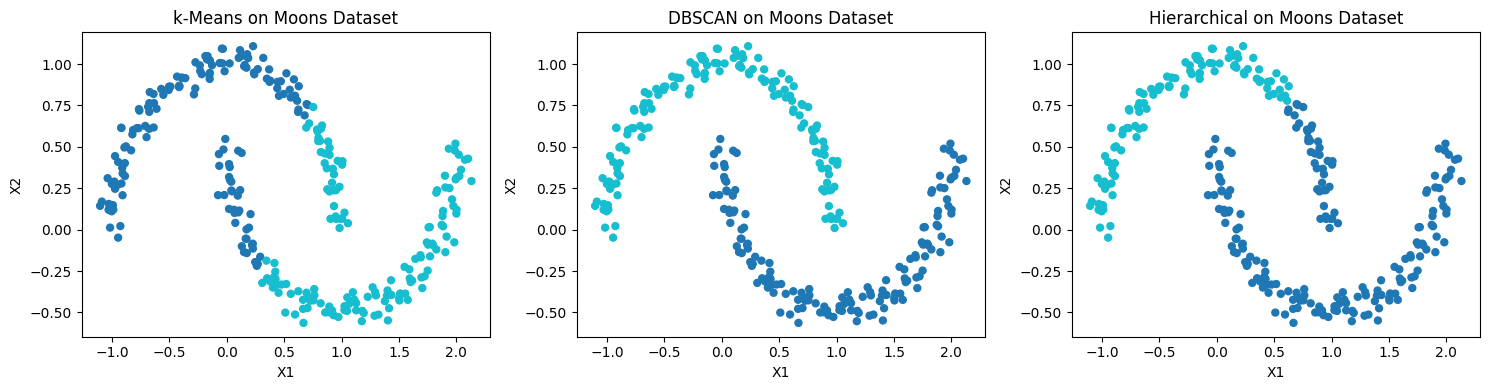

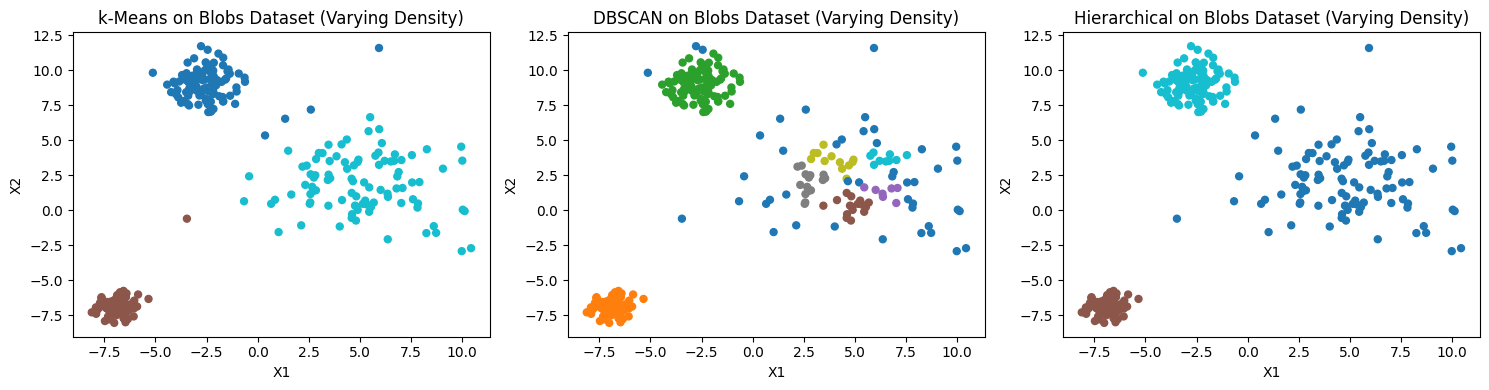

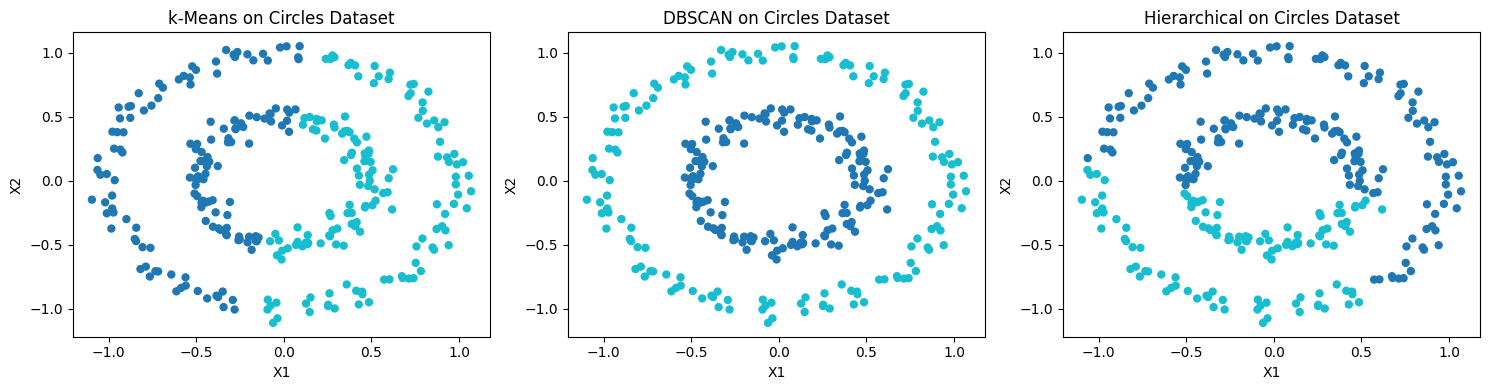

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

def apply_clustering_and_plot(X, dataset_name, eps=0.2, min_samples=5, k=2, centers=None):
    """Applies k-Means, DBSCAN, and Hierarchical clustering and plots results"""
    if centers: k = centers  
    
    kmeans = KMeans(n_clusters=k, random_state=42).fit_predict(X)
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X)
    hier = AgglomerativeClustering(n_clusters=k).fit_predict(X)

    clustering_results = [kmeans, dbscan, hier]
    titles = ['k-Means', 'DBSCAN', 'Hierarchical']

    plt.figure(figsize=(15, 4))
    for i, (labels, title) in enumerate(zip(clustering_results, titles)):
        plt.subplot(1, 3, i+1)
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=25)
        plt.title(f'{title} on {dataset_name}')
        plt.xlabel('X1')
        plt.ylabel('X2')
    plt.tight_layout()
    plt.show()

#1. Non-spherical clusters (DBSCAN excels)
X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
apply_clustering_and_plot(X_moons, 'Moons Dataset', eps=0.2, min_samples=5, k=2)

#2. Varying densities (DBSCAN struggles)
X_blobs, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
apply_clustering_and_plot(X_blobs, 'Blobs Dataset (Varying Density)', eps=0.8, min_samples=5, k=3, centers=3)

#3. Non-linearly separable (DBSCAN works well again)
X_circles, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)
apply_clustering_and_plot(X_circles, 'Circles Dataset', eps=0.2, min_samples=5, k=2)